<a href="https://colab.research.google.com/github/nalinis07/APT_Proj_Ref_copy/blob/MASTER/AT_Lesson_73_Project_Solution_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Logistic Regression - Univariate Classification I

 2. Logistic Regression - Univariate Classification II


---

### Problem Statement

A researcher is interested in assessing how different factors such as GRE (Graduate Record Exam scores), GPA (grade point average), and prestige of the undergraduate institution (RANK) affect admission into graduate school.

Build a Logistic Regression model to help him analyse the impact of GRE scores on admissions.

---

### List of Activities

**Activity 1:** Analysing the Dataset

  
**Activity 2:**  Normalise the Dataset

**Activity 3:**  Calculate the Sigmoid Output

**Activity 4:** Model Prediction

**Activity 5:** Model Evaluation

---

#### Activity 1:  Analysing the Dataset



You are given with the UCLA inspired dataset on college admissions. This dataset consists of the following columns:

  **Source:** https://www.kaggle.com/mohansacharya/graduate-admissions
  
|Field|Description|
|---:|:---|
|admit|Binary; states whether the student is admitted or not|
|gre|GRE score of the student|
|gpa|GPA of the student on a $4$ point scale|
|rank|Rank of student's postgraduate institution|

Print the first five rows of the dataset.

 **Dataset Link:** https://curriculum.whitehatjr.com/APT+Asset/APT+projects+datasets/binary.csv


In [ ]:
# Import the required modules and load the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file = 'https://curriculum.whitehatjr.com/APT+Asset/APT+projects+datasets/binary.csv'
df = pd.read_csv(csv_file)

In [ ]:
# Print the first five rows of Dataframe.
df.head()

,Unnamed: 0,admit,gre,gpa,rank
0,0,0,380,3.61,3
1,1,1,660,3.67,3
2,2,1,800,4.00,1
3,3,1,640,3.19,4
4,4,0,520,2.93,4


---

#### Activity 2:  Normalise the Dataset

 Perform the following tasks:

 - Get the descriptive statistics for the `gre` column.

 - Normalise the `gre` column values by calculating their $Z$-scores (or standard scaler).



GRE Descriptive Statistics:
count    400.000000
mean     587.700000
std      115.516536
min      220.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64



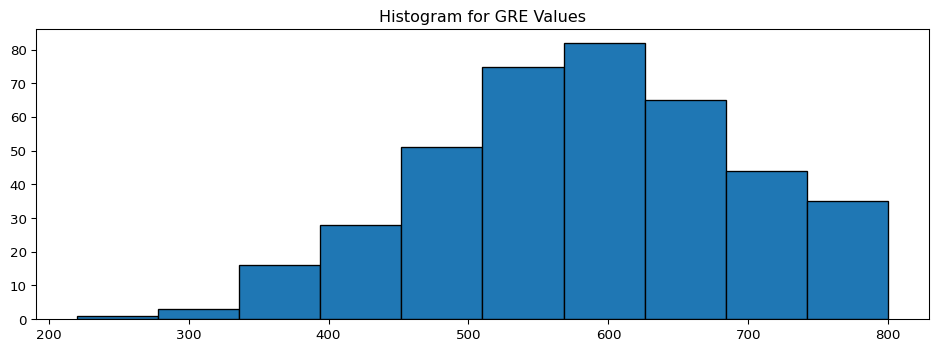

In [ ]:
# Get the descriptive statistics for the 'gre' column.
print(f"GRE Descriptive Statistics:\n{df['gre'].describe()}\n")
 # Plot a histogram to show the distribution of values for 'gre' column
plt.figure(figsize = (12, 4), dpi = 96)
plt.title("Histogram for GRE Values")
plt.hist(df['gre'], bins = 'sturges', edgecolor = 'black')
plt.show()

Descriptive statistics for the normalised gre scores:
count    4.000000e+02
mean    -3.927761e-16
std      1.000000e+00
min     -3.183094e+00
25%     -5.860633e-01
50%     -6.665712e-02
75%      6.258844e-01
max      1.837832e+00
Name: gre, dtype: float64



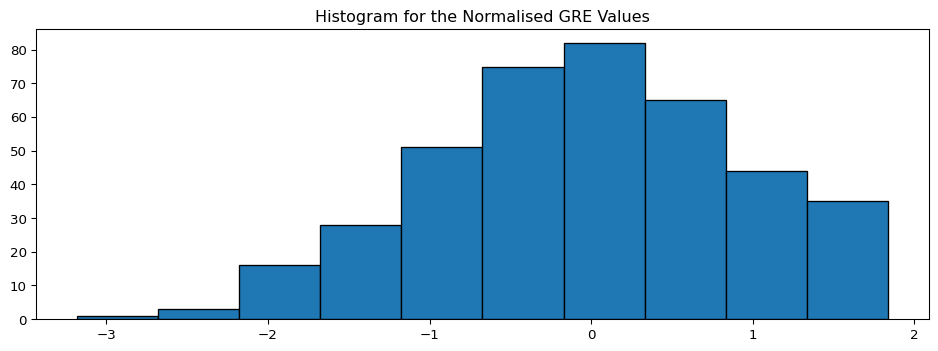

In [ ]:
# Normalise the 'gre' column values using the standard scaler method.
def standard_scaler(series):
  new_series = (series - series.mean()) / series.std()
  return new_series

# Get the descriptive statistics for the normalised 'gre' column.
gre_scaled = standard_scaler(df['gre'])
print(f"Descriptive statistics for the normalised gre scores:\n{gre_scaled.describe()}\n")

# Plot a histogram to show the distribution of values for normalised 'gre' column
plt.figure(figsize = (12, 4), dpi = 96)
plt.title("Histogram for the Normalised GRE Values")
plt.hist(gre_scaled, bins = 'sturges', edgecolor = 'black')
plt.show()

---

#### Activity 3:  Calculate the Sigmoid Output

1. Create a sigmoid function.

2.  Calculate the sigmoid output for the scaled (or Normalised) GRE scores.

In [ ]:
# Create a sigmoid() function using the above formula.
def sigmoid(x):
  return pd.Series(1 / (1 + np.exp(-x)))

In [ ]:
# Calculate the sigmoid output for the scaled (or normalised) GRE scores.
gre_scaled_sigmoid_output = sigmoid(gre_scaled)

# Get the descriptive statistics for the sigmoid output of normalised 'gre'.
print(f"Descriptive stats for sigmoid output of scaled GRE scores:\n{gre_scaled_sigmoid_output.describe()}")

Descriptive stats for sigmoid output of scaled GRE scores:
count    400.000000
mean       0.501370
std        0.210643
min        0.039807
25%        0.357539
50%        0.483342
75%        0.651556
max        0.862692
Name: gre, dtype: float64


---

#### Activity 4:  Model Prediction

Consider the threshold probability value of 0.5.

- Create a function that classifies the sigmoid output for the scaled  GRE scores into 0s and 1s using the threshold value of 0.5


In [ ]:
# Create a function 'predict()' that takes the sigmoid output and the threshold
# and returns a Pandas series containing the predicted values (0s and 1s) as the output.

def predict(sigmoid_output, threshold):
  y_pred = [1 if output >= threshold else 0 for output in sigmoid_output]
  return pd.Series(y_pred)

In [ ]:
# Use the 'predict()' function to classify the 'sigmoid()' function outputs as 0 and 1.
# Consider threshold value of 0.5.
threshold = 0.5
y_pred = predict(gre_scaled_sigmoid_output, threshold)
y_pred

0      0
1      1
2      1
3      1
4      0
      ..
395    1
396    0
397    0
398    1
399    1
Length: 400, dtype: int64

---

#### Activity 5:  Model Evaluation

Evaluate the model by calculating the number of false positives and false negatives using a confusion matrix. Also print the classification report for the predicted values.

In [ ]:
# Create a confusion matrix for the predicted values.
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['admit'], y_pred))

[[154 119]
 [ 49  78]]


In [ ]:
# Print the classification report for the predicted values.
from sklearn.metrics import classification_report

print(classification_report(df['admit'], y_pred))

              precision    recall  f1-score   support

           0       0.76      0.56      0.65       273
           1       0.40      0.61      0.48       127

    accuracy                           0.58       400
   macro avg       0.58      0.59      0.56       400
weighted avg       0.64      0.58      0.59       400



----